<a href="https://colab.research.google.com/github/the-nameshifter/Artificial-Neural-Networks/blob/main/Artificial_NN_Celsius_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
- We need built a simple machine learning model to convert celsius to fahrenheit.
- The ecuation is as follows T(°F) = T(°C) x 9/5 
32
- For example to convert 0°C celsius temperature to fahrenheit: (0°C x 9/5) + 32 = 32°F

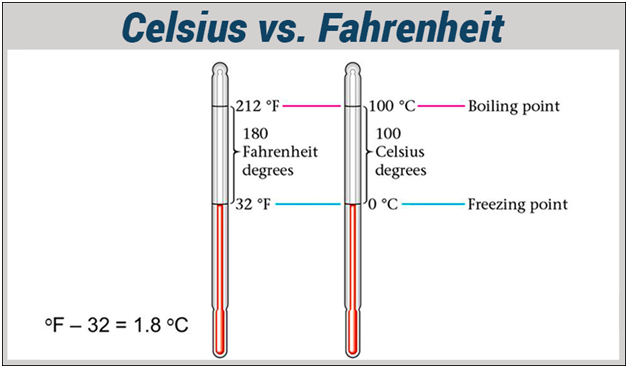

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Dataset_df = pd.read_csv('/content/Celsius+to+Fahrenheit.csv')

In [7]:
Dataset_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [4]:
Dataset_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [5]:
Dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


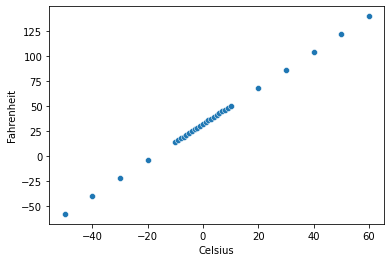

In [9]:
sns.scatterplot(Dataset_df['Celsius'], Dataset_df['Fahrenheit'])

In [10]:
X_train = Dataset_df['Celsius']
Y_train = Dataset_df['Fahrenheit']

In [17]:
X_train.shape

(30,)

In [12]:
Y_train.shape

(30,)

In [13]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [30]:
epochs_hist = model.fit(X_train, Y_train, epochs = 180 )

Epoch 1/180
1/1 [==============================] - 0s 283ms/step - loss: 7.7407e-07
Epoch 2/180
1/1 [==============================] - 0s 11ms/step - loss: 127.6063
Epoch 3/180
1/1 [==============================] - 0s 16ms/step - loss: 8.3460
Epoch 4/180
1/1 [==============================] - 0s 7ms/step - loss: 27.0026
Epoch 5/180
1/1 [==============================] - 0s 7ms/step - loss: 73.4414
Epoch 6/180
1/1 [==============================] - 0s 6ms/step - loss: 56.2150
Epoch 7/180
1/1 [==============================] - 0s 5ms/step - loss: 16.6354
Epoch 8/180
1/1 [==============================] - 0s 7ms/step - loss: 0.0239
Epoch 9/180
1/1 [==============================] - 0s 6ms/step - loss: 14.7222
Epoch 10/180
1/1 [==============================] - 0s 6ms/step - loss: 34.2266
Epoch 11/180
1/1 [==============================] - 0s 6ms/step - loss: 34.3679
Epoch 12/180
1/1 [==============================] - 0s 6ms/step - loss: 18.1159
Epoch 13/180
1/1 [=========================

In [31]:
epochs_hist.history.keys()

dict_keys(['loss'])

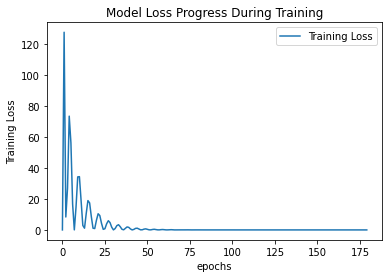

In [32]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [33]:
model.get_weights()

[array([[1.8000196]], dtype=float32), array([32.000015], dtype=float32)]

In [36]:
Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in Deg Fahrenheit Using Trained ANN =', Temp_F)

Temperature in Deg Fahrenheit Using Trained ANN = [[32.000015]]


In [37]:
Temp_C = 100
Temp_F = model.predict([Temp_C])
print('Temperature in Deg Fahrenheit Using Trained ANN =', Temp_F)

Temperature in Deg Fahrenheit Using Trained ANN = [[212.00198]]
